In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [35]:
data = pd.read_csv('train.csv')

In [36]:
data.head().T

,0,1,2,3,4
id,7.000000,9.000000,13.000000,16.000000,17.000000
target,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_01,2.000000,1.000000,5.000000,0.000000,0.000000
ps_ind_02_cat,2.000000,1.000000,4.000000,1.000000,2.000000
ps_ind_03,5.000000,7.000000,9.000000,2.000000,0.000000
ps_ind_04_cat,1.000000,0.000000,1.000000,0.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_07_bin,1.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,1.000000,1.000000,0.000000,0.000000


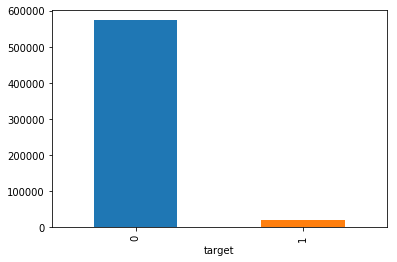

In [37]:
data.groupby('target')['target'].count().plot.bar()

In [38]:
import seaborn as sns

In [39]:
temp = []
for f in data.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif data[f].dtype == float:
        level = 'interval'
    elif data[f].dtype == int:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = data[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    temp.append(f_dict)
    
meta = pd.DataFrame(temp, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

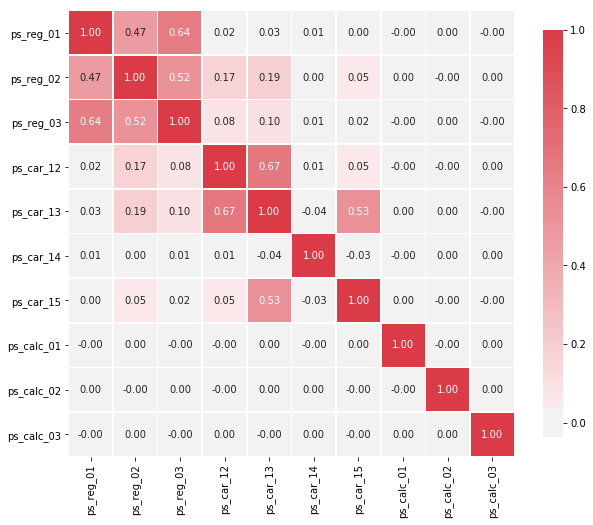

In [40]:
def corr_heatmap(v):
    correlations = data[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

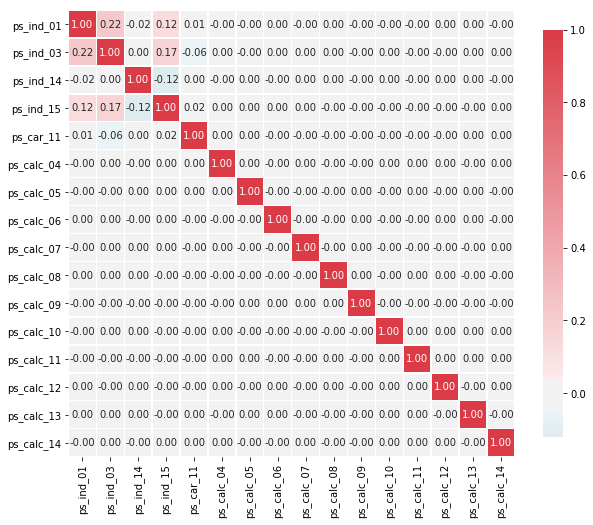

In [41]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

In [42]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(data.shape[1]))
data = pd.get_dummies(data, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(data.shape[1]))

Before dummification we have 59 variables in train
After dummification we have 215 variables in train


In [43]:
data.head().T

,0,1,2,3,4
id,7.000000,9.000000,13.000000,16.000000,17.000000
target,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_01,2.000000,1.000000,5.000000,0.000000,0.000000
ps_ind_03,5.000000,7.000000,9.000000,2.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_07_bin,1.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,1.000000,1.000000,0.000000,0.000000
ps_ind_09_bin,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_10_bin,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_11_bin,0.000000,0.000000,0.000000,0.000000,0.000000


In [64]:
X = data.drop('target', axis=1)
y = data['target']

In [72]:
kfold = 5
skf = StratifiedKFold(n_splits=kfold, random_state=2013)
s = 0
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(' RandomForest kfold: {}  of  {} : '.format(i+1, kfold))
    x_train, x_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    print('Accuracy on train: {}'.format(accuracy_score(y_train, rf.predict(x_train))))
    y_pred = rf.predict(x_test)
    print('Accuracy on test: {}'.format(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

 RandomForest kfold: 1  of  5 : 
Accuracy on train: 0.9910724973696313
Accuracy on test: 0.24421427551388994
             precision    recall  f1-score   support

          0       0.95      0.23      0.37    114704
          1       0.03      0.71      0.06      4339

avg / total       0.92      0.24      0.36    119043

 RandomForest kfold: 2  of  5 : 
Accuracy on train: 0.991232104567916
Accuracy on test: 0.9635257848004503
             precision    recall  f1-score   support

          0       0.96      1.00      0.98    114704
          1       0.00      0.00      0.00      4339

avg / total       0.93      0.96      0.95    119043

 RandomForest kfold: 3  of  5 : 
Accuracy on train: 0.9911964029577734
Accuracy on test: 0.9635509857782482
             precision    recall  f1-score   support

          0       0.96      1.00      0.98    114704
          1       0.00      0.00      0.00      4339

avg / total       0.93      0.96      0.95    119043

 RandomForest kfold: 4  of  5 :

/home/cruigo/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy on train: 0.991146019278829
Accuracy on test: 0.963542279195578
             precision    recall  f1-score   support

          0       0.96      1.00      0.98    114703
          1       0.33      0.00      0.00      4339

avg / total       0.94      0.96      0.95    119042

 RandomForest kfold: 5  of  5 : 
Accuracy on train: 0.991232141394583
Accuracy on test: 0.9068472207054712
             precision    recall  f1-score   support

          0       0.96      0.94      0.95    114703
          1       0.04      0.07      0.05      4338

avg / total       0.93      0.91      0.92    119041



In [74]:
halved = rand_split(data, 0, 0.5, 42)
X = halved.drop('target', axis=1)
y = halved['target']
kfold = 5
skf = StratifiedKFold(n_splits=kfold, random_state=2013)
s = 0
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(' RandomForest kfold: {}  of  {} : '.format(i+1, kfold))
    x_train, x_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    print('Accuracy on train: {}'.format(accuracy_score(y_train, rf.predict(x_train))))
    y_pred = rf.predict(x_test)
    print('Accuracy on test: {}'.format(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

 RandomForest kfold: 1  of  5 : 


/home/cruigo/anaconda3/lib/python3.5/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [44]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis=1).values, data['target'].values)

In [46]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
print(classification_report(y_test, rf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    143384
          1       0.29      0.00      0.00      5419

avg / total       0.94      0.96      0.95    148803



In [47]:
def rand_split(train, target, prop, random_state):
    targeted = train[train['target'] == target]
    nontarget = train[train['target'] != target]
    sample = targeted.sample(frac=prop, random_state=random_state, replace=True)
    return nontarget.append(sample)

In [59]:
halved = rand_split(data, 0, 0.3, 42)
x_train, x_test, y_train, y_test = train_test_split(halved.drop('target', axis=1).values, halved['target'].values)

In [61]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94     43033
          1       0.27      0.00      0.01      5405

avg / total       0.82      0.89      0.84     48438



In [50]:
def distr(train):
    print('Distribution of Events : ')
    dfOut = train['target'].value_counts().reset_index()
    dfOut.columns = ['target', 'event']
    dfOut['eventRate'] = dfOut['event']/sum(dfOut['event'])
    print(dfOut)

In [60]:
distr(halved)

Distribution of Events : 
   target   event  eventRate
0       0  172055    0.88803
1       1   21694    0.11197


In [56]:
distr(data)

Distribution of Events : 
   target   event  eventRate
0       0  573518   0.963552
1       1   21694   0.036448


In [62]:
accuracy_score(y_test, y_pred)

0.8874643874643875

# Ensemble methods

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
print(data['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
train_df = pd.DataFrame(data['data'], columns=data['feature_names'])

NameError: name 'pd' is not defined

In [21]:
train_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
from sklearn.metrics import classification_report

In [22]:
x_train, x_test, y_train, y_test = train_test_split(train_df, data['target'], random_state=42)

In [24]:
boosting = AdaBoostClassifier()
boosting.fit(x_train, y_train)
print(classification_report(y_train, boosting.predict(x_train)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       158
          1       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00       426



In [26]:
y_pred = boosting.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94        54
          1       0.99      0.93      0.96        89

avg / total       0.95      0.95      0.95       143



In [27]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(x_train, y_train)
print(classification_report(y_train, grad_boost.predict(x_train)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       158
          1       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00       426



In [28]:
y_pred = grad_boost.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        54
          1       0.97      0.97      0.97        89

avg / total       0.96      0.96      0.96       143



In [29]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print(classification_report(y_train, rf.predict(x_train)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       158
          1       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00       426



In [30]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95        54
          1       0.97      0.98      0.97        89

avg / total       0.97      0.97      0.96       143



In [31]:
extra = ExtraTreesClassifier()
extra.fit(x_train, y_train)
print(classification_report(y_train, extra.predict(x_train)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       158
          1       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00       426



In [32]:
y_pred = extra.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.96      0.95        54
          1       0.98      0.97      0.97        89

avg / total       0.97      0.97      0.97       143



In [31]:
extra = ExtraTreesClassifier()
extra.fit(x_train, y_train)
print(classification_report(y_train, extra.predict(x_train)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       158
          1       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00       426

